In [1]:
%matplotlib inline
import xarray as xr
from glob import glob
import numpy as np
import pandas as pd
import cartopy.crs as ccrs   # map plots
import cartopy.feature as cfeature
from e3sm_utils import cmclimate
cmap_prect = cmclimate.cm.WhiteBlueGreenYellowRed
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## monthly/mcs_rainmap datasets

Plot equivalent of Fig. 3 from Feng et al manuscript

In [2]:
ds1 = xr.open_mfdataset('/global/cscratch1/sd/crjones/ECP/e3sm-mmf/statstb/monthly/mcs_rainmap_*.nc')
ds2 = xr.open_mfdataset('/global/cscratch1/sd/crjones/ECP/e3sm/statstb/monthly/mcs_rainmap_*.nc')

In [4]:
ds1['mcs_precipitation'].attrs

OrderedDict([('long_name', 'MCS precipitation'), ('units', 'mm')])

In [4]:
dsx = xr.concat([ds1, ds2], dim=pd.Index(('MMF', 'E3SM'), name='model'))

In [5]:
# prepare figure canvas:
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

In [6]:
region = {'lat': slice(25, 50), 'lon': slice(255, 290)}

In [7]:
ds_season = dsx.groupby('time.season').mean(dim='time')
ds_season

<xarray.Dataset>
Dimensions:                  (lat: 120, lon: 320, model: 2, season: 3)
Coordinates:
  * lat                      (lat) float32 20.125 20.375 ... 49.625 49.875
  * lon                      (lon) float32 220.125 220.375 ... 299.625 299.875
  * model                    (model) object 'MMF' 'E3SM'
  * season                   (season) object 'JJA' 'MAM' 'SON'
Data variables:
    precipitation            (season, model, lat, lon) float32 dask.array<shape=(3, 2, 120, 320), chunksize=(1, 1, 120, 320)>
    mcs_precipitation        (season, model, lat, lon) float32 dask.array<shape=(3, 2, 120, 320), chunksize=(1, 1, 120, 320)>
    mcs_precipitation_count  (season, model, lat, lon) float32 dask.array<shape=(3, 2, 120, 320), chunksize=(1, 1, 120, 320)>
    mcs_number               (season, model, lat, lon) float32 dask.array<shape=(3, 2, 120, 320), chunksize=(1, 1, 120, 320)>
    ntimes                   (season, model) float64 dask.array<shape=(3, 2), chunksize=(1, 1)>

In [12]:
precip_count = ds_season['mcs_precipitation_count']

In [16]:
# mcs precipitation percentage
precip_frac = (ds_season['mcs_precipitation'] / ds_season['precipitation']).load()
precip_frac.name = 'mcs_precip_fraction'
precip_frac.attrs = {'long_name': 'Fraction of precipitation from MCS',
                     'units': ' '}

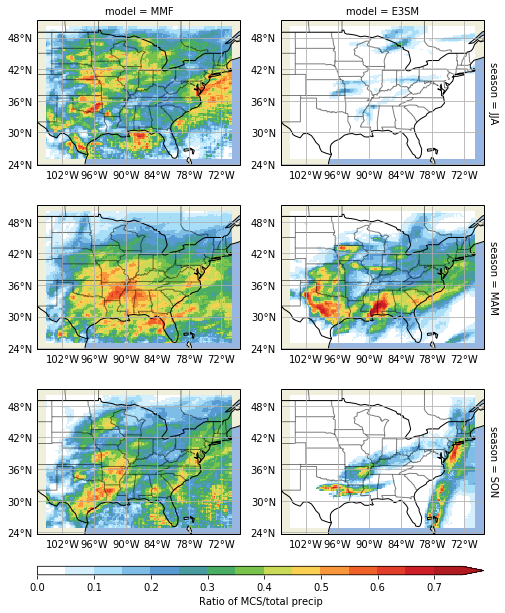

In [21]:
p = precip_frac.sel(**region).plot(x='lon', y='lat', col='model', row='season', figsize=(8, 12),
                                   subplot_kws={'projection': ccrs.PlateCarree()}, 
                                   transform=ccrs.PlateCarree(), cmap=cmap_prect,
                                   levels=np.arange(0, 0.8, 0.05),
                                   robust=False, cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50,
                                                              'label': 'Ratio of MCS/total precip'})
for ax in p.axes.flat:
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.5)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    # gl.xlocator = mticker.MaxNLocator(5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    # ax.gridlines()
    # regional_mean(da, ax, units=units, text_loc=[254, 50])

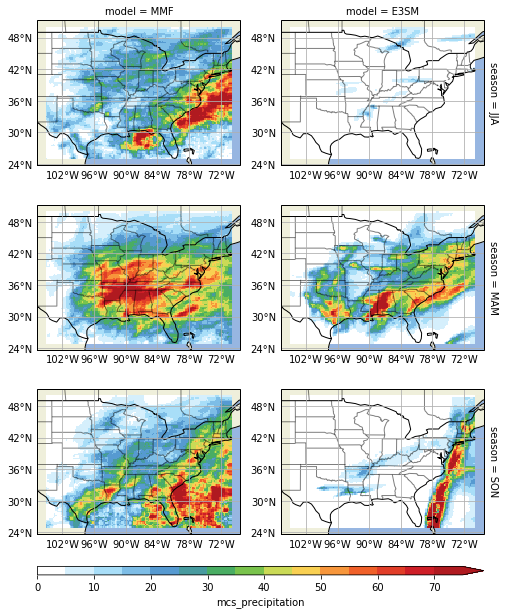

In [21]:
p = ds_season['mcs_precipitation'].sel(**region).plot(x='lon', y='lat', col='model', row='season', figsize=(8, 12),
                                                       subplot_kws={'projection': ccrs.PlateCarree()}, 
                                                       transform=ccrs.PlateCarree(), cmap=cmap_prect,
                                                       levels=np.arange(0, 80, 5),
                                                       robust=True, cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50,
                                                                                 }
                                                     )
for ax in p.axes.flat:
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.5)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    # gl.xlocator = mticker.MaxNLocator(5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    # ax.gridlines()
    # regional_mean(da, ax, units=units, text_loc=[254, 50])

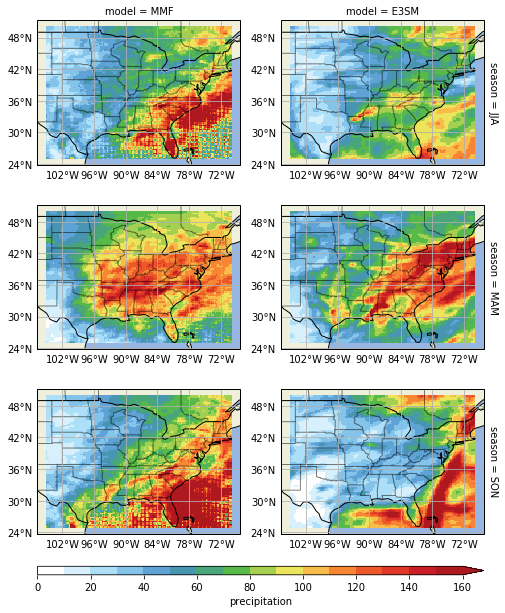

In [23]:
p = ds_season['precipitation'].sel(**region).plot(x='lon', y='lat', col='model', row='season', figsize=(8, 12),
                                                       subplot_kws={'projection': ccrs.PlateCarree()}, 
                                                       transform=ccrs.PlateCarree(), cmap=cmap_prect,
                                                       levels=np.arange(0, 170, 10),
                                                       robust=True, cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50,
                                                                                 }
                                                     )
for ax in p.axes.flat:
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.5)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    # gl.xlocator = mticker.MaxNLocator(5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    # ax.gridlines()
    # regional_mean(da, ax, units=units, text_loc=[254, 50])

In [2]:
# Fig 2: seasonal frequency of MCS
robust_files = sorted(glob('/global/cscratch1/sd/crjones/ECP/e3sm-mmf/statstb/robust_mcs_tracks*.nc'))

In [2]:
def link_track_to_pixel_files(this_track, pixel_files, pattern='%Y%m%d_%H%M'):
    # convert basetimes to string following pattern appearing in pixel_files names; drop NaTs
    basetimes = [bt.strftime(pattern) for bt in pd.to_datetime(this_track.base_time.values) if str(bt) != 'NaT']
    file_list = []
    for bt in basetimes:
        # tricky way to append a file matching the pattern if it's there, None if not
        file_list.append(([p for p in pixel_files if bt in p] + [None])[0])
    return file_list

def process_track(this_track, pixel_files):
    """Drop's times where base_time is NaT from this_track and 
    returns truncated this_track and pixel (map) dataSet for this track"""
    this_track = this_track.where(~np.isnat(this_track.base_time), drop=True)
    pixel_file_list = link_track_to_pixel_files(this_track, pixel_files)
    pix_ds = xr.open_mfdataset(pixel_file_list)
    return this_track, pix_ds

In [9]:
topdir = '/global/cscratch1/sd/crjones/ECP/e3sm-mmf'
# topdir = '/global/cscratch1/sd/crjones/ECP/e3sm'
robust_files = sorted(glob(topdir + '/statstb/robust_mcs_tracks*.nc'))
nlon = 320  # len(pix_ds.lon)
nlat = 120  # len(pix_ds.lat)
seasons = ['MAM', 'JJA', 'SON']

In [4]:
topdir = '/global/cscratch1/sd/crjones/ECP/e3sm-mmf'
# topdir = '/global/cscratch1/sd/crjones/ECP/e3sm'
robust_files = sorted(glob(topdir + '/statstb/robust_mcs_tracks*.nc'))
nlon = 320  # len(pix_ds.lon)
nlat = 120  # len(pix_ds.lat)
seasons = ['MAM', 'JJA', 'SON']
yearly_counts = {}

for robust_mcs_filename in robust_files:
    print('processing file {}'.format(robust_mcs_filename))
    stats_ds = xr.open_dataset(robust_mcs_filename)
    date_range = robust_mcs_filename[-20:-3]  # 200n0301_200n1031
    pixel_files = sorted(glob('{}/mcstracking/{}/mcstrack_*.nc'.format(topdir, date_range)))

    dat_dict = {season: np.zeros((nlat, nlon), dtype=np.int) for season in seasons}
    tracks_to_process = stats_ds.tracks.values
    for track in tracks_to_process:
        this_track, pix_ds = process_track(stats_ds.sel(tracks=track), pixel_files)
        track_id = track + 1
        da = (pix_ds['cloudtracknumber'] == track_id).groupby('time.season').sum(dim='time').load()
        for season in da.season.values:
            dat_dict[season] += (da.sel(season=season).values > 0).astype(int)
    yearly_counts[date_range] = dat_dict

processing file /global/cscratch1/sd/crjones/ECP/e3sm/statstb/robust_mcs_tracks_20010301_20011031.nc


In [5]:
# write dataset to file
# dimesions: either (year, season, lat, lon) or (time, lat, lon)
lons = pix_ds.lon
lats = pix_ds.lat
if 'e3sm-mmf' in topdir:
    years = pd.date_range(start='2001', end='2008', freq='A-JUN')
else:
    years = pd.date_range(start='2001', end='2002', freq='A-JUN')
years

DatetimeIndex(['2001-06-30'], dtype='datetime64[ns]', freq='A-JUN')

In [6]:
data = np.empty((len(years), len(seasons), len(lats), len(lons)), dtype=np.int)

In [8]:
sorted_keys = sorted([k for k in yearly_counts.keys()])
for ny, yr in enumerate(sorted_keys):
    for ns, season in enumerate(seasons):
        data[ny, ns, :, :] = yearly_counts[yr][season]

In [9]:
da = xr.DataArray(data, coords=[years, seasons, lats, lons],
                  dims=['year', 'season', 'lat', 'lon'],
                  name='seasonal_mcs_count',
                  attrs={'units': 'None', 
                         'long_name': 'seasonal_mcs_count'},
                 )
da

<xarray.DataArray 'seasonal_mcs_count' (year: 1, season: 3, lat: 120, lon: 320)>
array([[[[0, ..., 0],
         ...,
         [0, ..., 0]],

        ...,

        [[0, ..., 0],
         ...,
         [0, ..., 0]]]])
Coordinates:
  * year     (year) datetime64[ns] 2001-06-30
  * season   (season) <U3 'MAM' 'JJA' 'SON'
  * lat      (lat) float32 20.125 20.375 20.625 20.875 ... 49.375 49.625 49.875
  * lon      (lon) float32 220.125 220.375 220.625 ... 299.375 299.625 299.875
Attributes:
    units:      None
    long_name:  seasonal_mcs_count

In [11]:
da.to_netcdf(topdir + '/seasonal_mcs_count.nc')

In [10]:
dsx = xr.open_dataset(topdir + '/seasonal_mcs_count.nc')
dsx

<xarray.Dataset>
Dimensions:             (lat: 120, lon: 320, season: 3, year: 7)
Coordinates:
  * year                (year) datetime64[ns] 2001-06-30 ... 2007-06-30
  * season              (season) object 'MAM' 'JJA' 'SON'
  * lat                 (lat) float32 20.125 20.375 20.625 ... 49.625 49.875
  * lon                 (lon) float32 220.125 220.375 ... 299.625 299.875
Data variables:
    seasonal_mcs_count  (year, season, lat, lon) int64 ...

In [15]:
np.all(dsx['seasonal_mcs_count'].values == da.values)

True

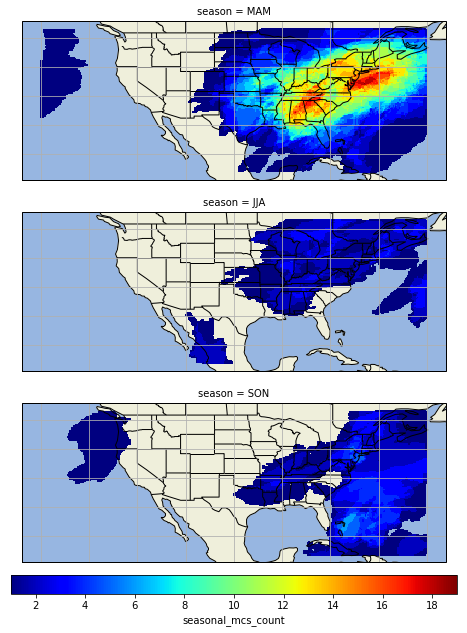

In [30]:
# dat = dsx['seasonal_mcs_count'].astype(np.float)
dat = dsx['seasonal_mcs_count']
dat = dat.where(dat > 0)
# dat.values[dat.values <1e-3] = np.nan
p = dat.mean(dim='year').plot(row='season', transform=ccrs.PlateCarree(),
                                                subplot_kws={'projection': ccrs.PlateCarree()},
                                                cbar_kwargs={'orientation': 'horizontal', 'pad': 0.02, 'aspect': 24},
                                                cmap=plt.cm.jet, figsize=(8, 12),
                                               )
for ax in p.axes.flat:
    ax.add_feature(states_provinces, edgecolor='black', alpha=1)
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.gridlines()

In [28]:
# prepare figure canvas:
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


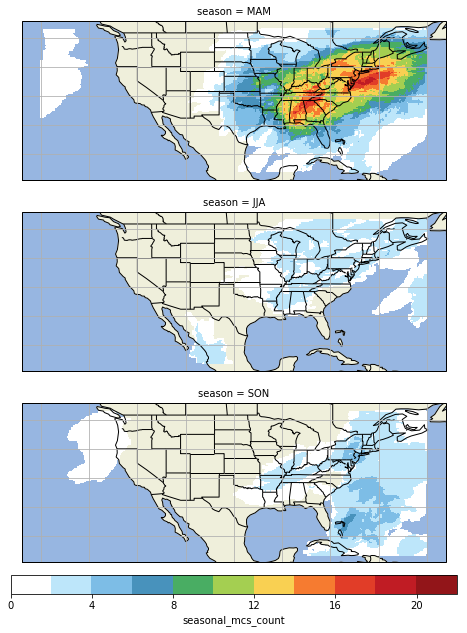

In [16]:
# MMF
ds_e3sm = xr.open_dataset('/global/cscratch1/sd/crjones/ECP/e3sm/seasonal_mcs_count.nc')
dat = ds_e3sm['seasonal_mcs_count']
dat = dat.where(dat > 0)
p = dat.mean(dim='year').plot(row='season', transform=ccrs.PlateCarree(),
                              subplot_kws={'projection': ccrs.PlateCarree()},
                              cbar_kwargs={'orientation': 'horizontal', 'pad': 0.02, 'aspect': 24},
                              cmap=cmap_prect, figsize=(8, 12), robust=True,
                              levels=np.arange(0, 24, 2),
                             )
for ax in p.axes.flat:
    ax.add_feature(states_provinces, edgecolor='black', alpha=1)
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.gridlines()

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


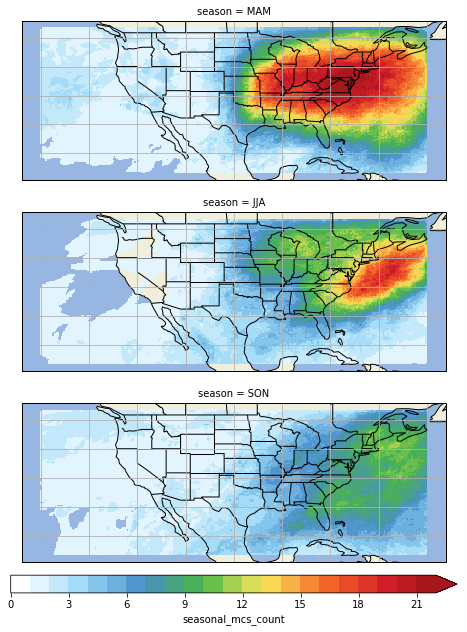

In [18]:
# MMF
ds_mmf = xr.open_dataset('/global/cscratch1/sd/crjones/ECP/e3sm-mmf/seasonal_mcs_count.nc')
dat = ds_mmf['seasonal_mcs_count']
dat = dat.where(dat > 0)
p = dat.mean(dim='year').plot(row='season', transform=ccrs.PlateCarree(),
                              subplot_kws={'projection': ccrs.PlateCarree()},
                              cbar_kwargs={'orientation': 'horizontal', 'pad': 0.02, 'aspect': 24},
                              cmap=cmap_prect, figsize=(8, 12), robust=True,
                              levels=np.arange(0, 23, 1),
                             )
for ax in p.axes.flat:
    ax.add_feature(states_provinces, edgecolor='black', alpha=1)
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.gridlines()

(array([7.1043e+04, 1.5903e+04, 1.0359e+04, 5.5260e+03, 2.5990e+03,
        1.5680e+03, 1.1120e+03, 7.7100e+02, 7.7300e+02, 7.4600e+02,
        7.7600e+02, 9.8700e+02, 9.3000e+02, 8.3800e+02, 5.5500e+02,
        2.8800e+02, 2.1400e+02, 1.4300e+02, 6.8000e+01, 1.0000e+00,
        0.0000e+00, 0.0000e+00]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
        21.5]),
 <a list of 22 Patch objects>)

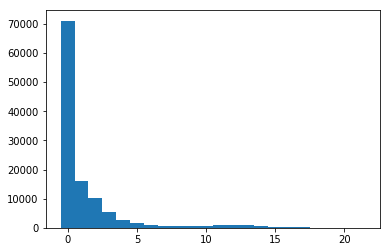

In [41]:
plt.hist(np.ravel(data), bins=np.arange(-0.5, 22.5))

In [26]:
len(years)

6

In [22]:
sorted_keys = sorted(k for k in yearly_counts.keys())
sorted_keys

['20010301_20011031',
 '20020301_20021031',
 '20030301_20031031',
 '20040301_20041031',
 '20050301_20051031',
 '20060301_20061031',
 '20070301_20071031']

In [13]:
yearly_counts

{'20010301_20011031': {'MAM': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 1, 0, 0],
         ...,
         [0, 0, 0, ..., 7, 7, 6],
         [0, 0, 0, ..., 8, 7, 6],
         [0, 0, 0, ..., 6, 6, 0]]),
  'JJA': array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  9, 10,  9],
         [ 0,  0,  0, ...,  9,  9,  8],
         [ 0,  0,  0, ...,  7,  8,  0]]),
  'SON': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 2, 0, 0],
         [0, 0, 0, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 9, 9, 9],
         [0, 1, 1, ..., 8, 8, 8],
         [0, 0, 1, ..., 7, 8, 0]])},
 '20020301_20021031': {'MAM': array([[0, 0, 0, ..., 1, 1, 0],
         [0, 0, 0, ..., 2, 2, 2],
         [0, 0, 0, ..., 2, 2, 2],
         ...,
         [0, 0, 0, ..., 6, 6, 5],
         [0, 0, 0, ..., 6, 6, 5],
         [0, 0, 0, ..., 5, 5, 0]]),
  'JJA': arra

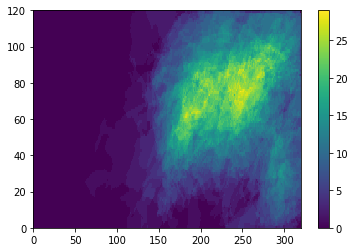

In [66]:
plt.pcolor(dat_dict['MAM'])
plt.colorbar()

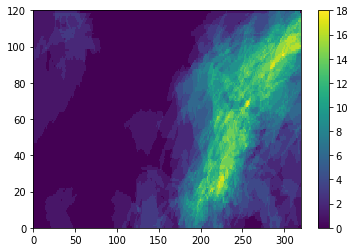

In [67]:
plt.pcolor(dat_dict['SON'])
plt.colorbar()

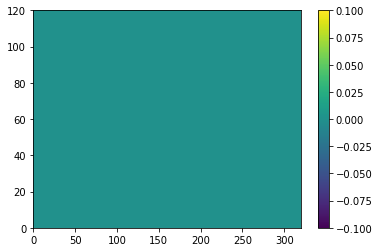

In [68]:
plt.pcolor(dat_dict['DJF'])
plt.colorbar()

In [59]:
track = 96
this_track = stats_ds.isel(tracks=track)
this_track, pix_ds = process_track(this_track, pixel_files)
track_id = track + 1
da = (pix_ds['cloudtracknumber'] == track_id).groupby('time.season').sum(dim='time').load()
for season in da.season.values:
    dat_dict[season] += (da.sel(season=season).values > 0).astype(int)
# for track in tracks_to_process:
#    this_track, pix_ds = process_track(stats_ds.sel(tracks=track))
#    track_id = track + 1
#    dat = dat + ((pix_ds.cloudtracknumber == track_id).sum(dim='time').values > 0).astype(int)
#plt.pcolormesh(dat)
#plt.colorbar()

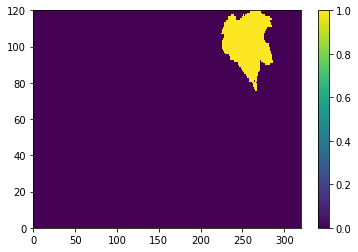

In [62]:
plt.pcolor(dat_dict['JJA'])
plt.colorbar()

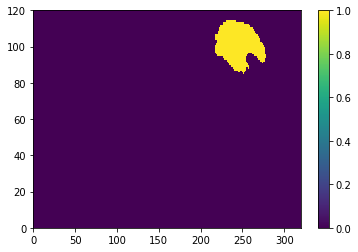

In [63]:
plt.pcolor(dat_dict['MAM'])
plt.colorbar()

In [58]:
da.season.values[0]

'JJA'

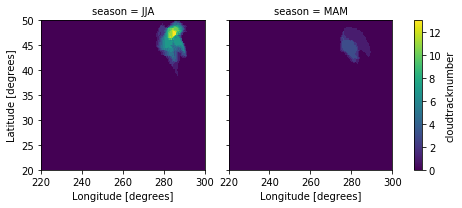

In [53]:
da.plot(col='season')

In [38]:
pix_ds['time.season']

<xarray.DataArray 'season' (time: 14)>
array(['MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM', 'MAM',
       'MAM', 'MAM', 'MAM', 'MAM'], dtype='<U3')
Coordinates:
  * time     (time) datetime64[ns] 2001-03-07T12:00:00 ... 2001-03-08T01:00:00

In [39]:
pix_ds

<xarray.Dataset>
Dimensions:               (lat: 120, lon: 320, time: 14)
Coordinates:
  * lon                   (lon) float32 220.125 220.375 ... 299.625 299.875
  * lat                   (lat) float32 20.125 20.375 20.625 ... 49.625 49.875
  * time                  (time) datetime64[ns] 2001-03-07T12:00:00 ... 2001-03-08T01:00:00
Data variables:
    base_time             (time) datetime64[ns] dask.array<shape=(14,), chunksize=(1,)>
    julian_day            (time) float64 dask.array<shape=(14,), chunksize=(1,)>
    longitude             (time, lat, lon) float32 dask.array<shape=(14, 120, 320), chunksize=(1, 120, 320)>
    latitude              (time, lat, lon) float32 dask.array<shape=(14, 120, 320), chunksize=(1, 120, 320)>
    numclouds             (time) int32 dask.array<shape=(14,), chunksize=(1,)>
    tb                    (time, lat, lon) float32 dask.array<shape=(14, 120, 320), chunksize=(1, 120, 320)>
    precipitation         (time, lat, lon) float32 dask.array<shape=(14, 12

In [21]:
stats_ds

<xarray.Dataset>
Dimensions:             (nmaxmerge: 100, nmaxpf: 10, nmaxpix: 10000, times: 120, tracks: 259)
Coordinates:
  * tracks              (tracks) int32 0 1 2 3 4 5 6 ... 253 254 255 256 257 258
  * times               (times) float32 0.0 1.0 2.0 3.0 ... 117.0 118.0 119.0
Dimensions without coordinates: nmaxmerge, nmaxpf, nmaxpix
Data variables:
    length              (tracks) float32 ...
    mcs_length          (tracks) float32 ...
    mcs_type            (tracks) int16 ...
    starttrackresult    (tracks) float32 ...
    endtrackresult      (tracks) float32 ...
    base_time           (tracks, times) datetime64[ns] ...
    julian_day          (tracks, times) float64 ...
    datetimestring      (tracks, times) |S19 ...
    mcs_status          (tracks, times) float32 ...
    meanlat             (tracks, times) float32 ...
    meanlon             (tracks, times) float32 ...
    core_area           (tracks, times) float32 ...
    ccs_area            (tracks, times) float32 ...

In [1]:
lats = pix_ds.lat.values
lons = pix_ds.lon.values
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()})
for (season, ax) in zip(seasons, axes.flat):
    p = ax.pcolor(lons, lats, dat_dict[season], cmap=plt.cm.jet)
    plt.colorbar(p)

NameError: name 'pix_ds' is not defined

In [34]:
stats_ds.isel(tracks=0).cloudnumber.attrs

OrderedDict([('description', 'Cloud number in the corresponding cloudid file'),
             ('usage',
              'To link this tracking statistics file with pixel-level cloudid files, use the cloudidfile and cloudnumber together to identify which cloud this current track and time is associated with')])